In [2]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import os

BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-0.png', 'cat-4.png', 'cat-1.png', 'cat-3.png', 'cat-2.png']

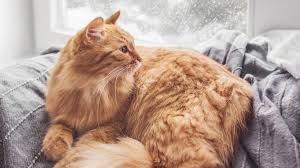

In [3]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-4.png")
display(Image.fromarray(cv.cvtColor(img, cv.COLOR_BGR2RGB)))

In [7]:
# translation
def translate(img, x, y):
    transMat = np.float32([[1, 0, x], [0, 1, y]])
    dim = (img.shape[1], img.shape[0])
    return cv.warpAffine(src=img, M=transMat, dsize=dim)

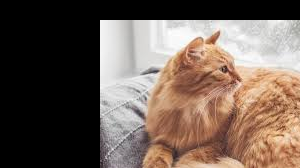

In [8]:
# Image translation
# -x => left, x => right
# -y => up, y => down
dst = translate(img, 100, 20)
display(Image.fromarray(cv.cvtColor(dst, cv.COLOR_BGR2RGB)))

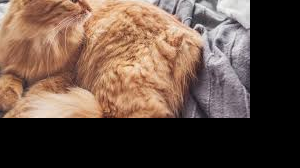

In [10]:
dst = translate(img, -50, -50)
display(Image.fromarray(cv.cvtColor(dst, cv.COLOR_BGR2RGB)))

In [11]:
# Rotation
def rotate(img, angle, rotPoint=None):
    (h, w) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (w // 2, h // 2) # center
    
    rot_mat = cv.getRotationMatrix2D(center=rotPoint, angle=angle, scale=1.0)
    dims = (w, h)
    return cv.warpAffine(img, rot_mat, dims)

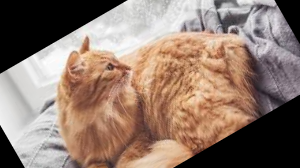

In [12]:
# -angle => clockwise
dst = rotate(img, 30)
display(Image.fromarray(cv.cvtColor(dst, cv.COLOR_BGR2RGB)))

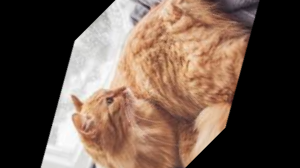

In [13]:
# rotate a rotated image
# rotating a rotated image will add a skew effect
rotated = rotate(dst, 45)
display(Image.fromarray(cv.cvtColor(rotated, cv.COLOR_BGR2RGB)))

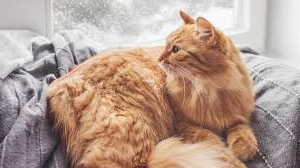

In [14]:
# Flip
# flip code
# - 0: vertically
# - 1: horizontally
# - -1: both of the above
dst = cv.flip(img, flipCode=1)
display(Image.fromarray(cv.cvtColor(dst, cv.COLOR_BGR2RGB)))

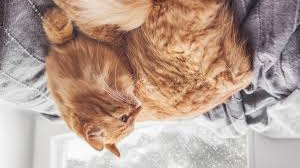

In [16]:
dst = cv.flip(img, 0)
display(Image.fromarray(cv.cvtColor(dst, cv.COLOR_BGR2RGB)))

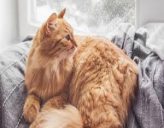

In [20]:
# Resize
# interpolation=cv.INTER_AREA is useful if you want to resize the image to a smaller size
# interpolation=cv.INTER_LINEAR is useful if you want to resize the image to a larger size
# interpolation=cv.INTER_CUBIC is useful if you want to resize the image to a larger size (slower but better quality)
resized = cv.resize(img, dsize=(164, 128), interpolation=cv.INTER_AREA)
resized = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
display(Image.fromarray(resized))

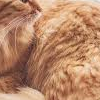

In [21]:
# Cropping
cropped = img[50:150, 100:200]
cropped = cv.cvtColor(cropped, cv.COLOR_BGR2RGB)
display(Image.fromarray(cropped))